In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

2023-04-12 21:51:12.870917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 21:51:13.143745: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/humble/lib/x86_64-linux-gnu:/opt/ros/humble/lib
2023-04-12 21:51:13.143776: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-12 21:51:14.040888: W tensorflow/compiler/xla/stream_executor/platform/defau

In [2]:
data = pd.read_csv("4_frame.txt", header=None)
data.columns = ["frame_id", "pedestrian_id", "x_position", "y_position", "z_position"]

In [3]:
data = data.drop(columns=["z_position"])

In [4]:
input_seq = []
output_seq = []
for pedestrian_id in data['pedestrian_id'].unique():
    ped_data = data[data['pedestrian_id'] == pedestrian_id]
    positions = ped_data[['x_position', 'y_position']].values
    for i in range(len(positions)-1):
        input_seq.append(positions[i])
        output_seq.append(positions[i+1])

In [5]:
input_seq = np.array(input_seq)
output_seq = np.array(output_seq)

In [6]:
input_seq = np.reshape(input_seq, (input_seq.shape[0], 1, input_seq.shape[1]))
output_seq = np.reshape(output_seq, (output_seq.shape[0], output_seq.shape[1]))

In [7]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, 2), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dense(2))

2023-04-12 21:51:16.690224: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/humble/lib/x86_64-linux-gnu:/opt/ros/humble/lib
2023-04-12 21:51:16.690249: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-12 21:51:16.690271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Michael-laptop): /proc/driver/nvidia/version does not exist
2023-04-12 21:51:16.690514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
T

In [8]:
model.compile(loss='mse', optimizer='adam')

In [9]:
train_size = int(0.8 * len(input_seq))
train_input_seq = input_seq[:train_size]
train_output_seq = output_seq[:train_size]
val_input_seq = input_seq[train_size:]
val_output_seq = output_seq[train_size:]

In [10]:
history = model.fit(train_input_seq, train_output_seq, epochs=100, batch_size=32, verbose=2, validation_data=(val_input_seq, val_output_seq))

Epoch 1/100
11078/11078 - 54s - loss: 2850.9470 - val_loss: 210.3456 - 54s/epoch - 5ms/step
Epoch 2/100
11078/11078 - 51s - loss: 57.7780 - val_loss: 15.0764 - 51s/epoch - 5ms/step
Epoch 3/100
11078/11078 - 51s - loss: 22.9763 - val_loss: 8.7899 - 51s/epoch - 5ms/step
Epoch 4/100
11078/11078 - 51s - loss: 18.4188 - val_loss: 12.0837 - 51s/epoch - 5ms/step
Epoch 5/100
11078/11078 - 51s - loss: 15.9289 - val_loss: 8.9861 - 51s/epoch - 5ms/step
Epoch 6/100
11078/11078 - 51s - loss: 14.6304 - val_loss: 7.2697 - 51s/epoch - 5ms/step
Epoch 7/100
11078/11078 - 51s - loss: 13.1013 - val_loss: 5.7233 - 51s/epoch - 5ms/step
Epoch 8/100
11078/11078 - 51s - loss: 11.9212 - val_loss: 6.4418 - 51s/epoch - 5ms/step
Epoch 9/100
11078/11078 - 51s - loss: 11.2884 - val_loss: 14.1678 - 51s/epoch - 5ms/step
Epoch 10/100
11078/11078 - 51s - loss: 10.5298 - val_loss: 7.6335 - 51s/epoch - 5ms/step
Epoch 11/100
11078/11078 - 51s - loss: 10.2070 - val_loss: 4.4704 - 51s/epoch - 5ms/step
Epoch 12/100
11078/1107

Epoch 94/100
11078/11078 - 49s - loss: 3.6847 - val_loss: 4.9540 - 49s/epoch - 4ms/step
Epoch 95/100
11078/11078 - 50s - loss: 3.9845 - val_loss: 5.7149 - 50s/epoch - 4ms/step
Epoch 96/100
11078/11078 - 49s - loss: 3.8429 - val_loss: 5.6023 - 49s/epoch - 4ms/step
Epoch 97/100
11078/11078 - 50s - loss: 3.8769 - val_loss: 5.2800 - 50s/epoch - 4ms/step
Epoch 98/100
11078/11078 - 50s - loss: 3.9924 - val_loss: 4.8299 - 50s/epoch - 5ms/step
Epoch 99/100
11078/11078 - 50s - loss: 3.7680 - val_loss: 4.3809 - 50s/epoch - 5ms/step
Epoch 100/100
11078/11078 - 50s - loss: 3.7036 - val_loss: 4.7833 - 50s/epoch - 4ms/step


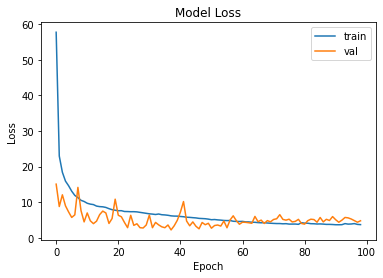

In [14]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [12]:
print(len(history.history['val_loss']))
print(len(history.history['loss']))

100
100
